# Comparitive Analysis of Machine Learning Methods

This notebook explores the performance of various Machine Learning methods. The method investigated are: Random Forest Classifier, Support Vector Machine (SVM), Logistic Regression and K-Nearest Neighbours (KNN).

These findings are the basis for an accompanying research paper. Please view the research paper to understand the process and findings.

#### Additional notes： We applied grid search + Cross validation (CV) to a wide range of parameters. The grid search is not extensive due to time constrainsts.

## Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# KNN
from sklearn.neighbors import KNeighborsClassifier
# SVM
from sklearn.svm import SVC

## Data Preprocessing

In [3]:
data = pd.read_csv('raw_data.csv')
col_name= data.columns[:-1]
label_name = data.columns[-1]
print('Labels of dataset：{}\n'.format(label_name))
#Check the features of the dataset
print('Features of dataset：{}\n'.format(col_name))
#Check the shape of the dataset
print('Shape of dataset：{}'.format(data.shape))

Labels of dataset：Cover_Type

Features of dataset：Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37',

In [4]:
#print the head 5 rows' data to check
data.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
# deccribe the distribution of the label "Cover_Type"
print("counts of different class:")
data['Cover_Type'].value_counts()

counts of different class:


2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

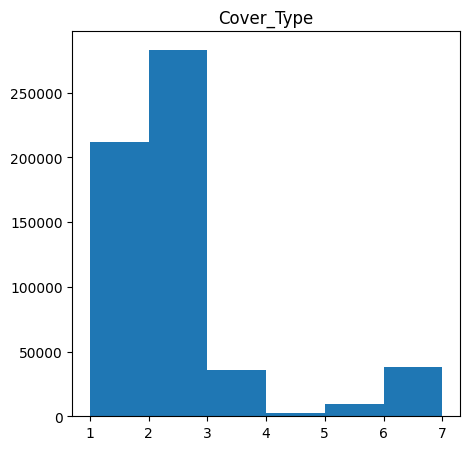

In [6]:
# plot the histogram distribution of the label "Cover_Type"
bins = range(1,8)
fig = plt.figure(figsize=(5,5))
axe = fig.add_subplot(1,1,1)   
axe.hist(data['Cover_Type'],bins=bins,align='mid')
plt.title('Cover_Type')
plt.show()

In [7]:
data.iloc[:,:60].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


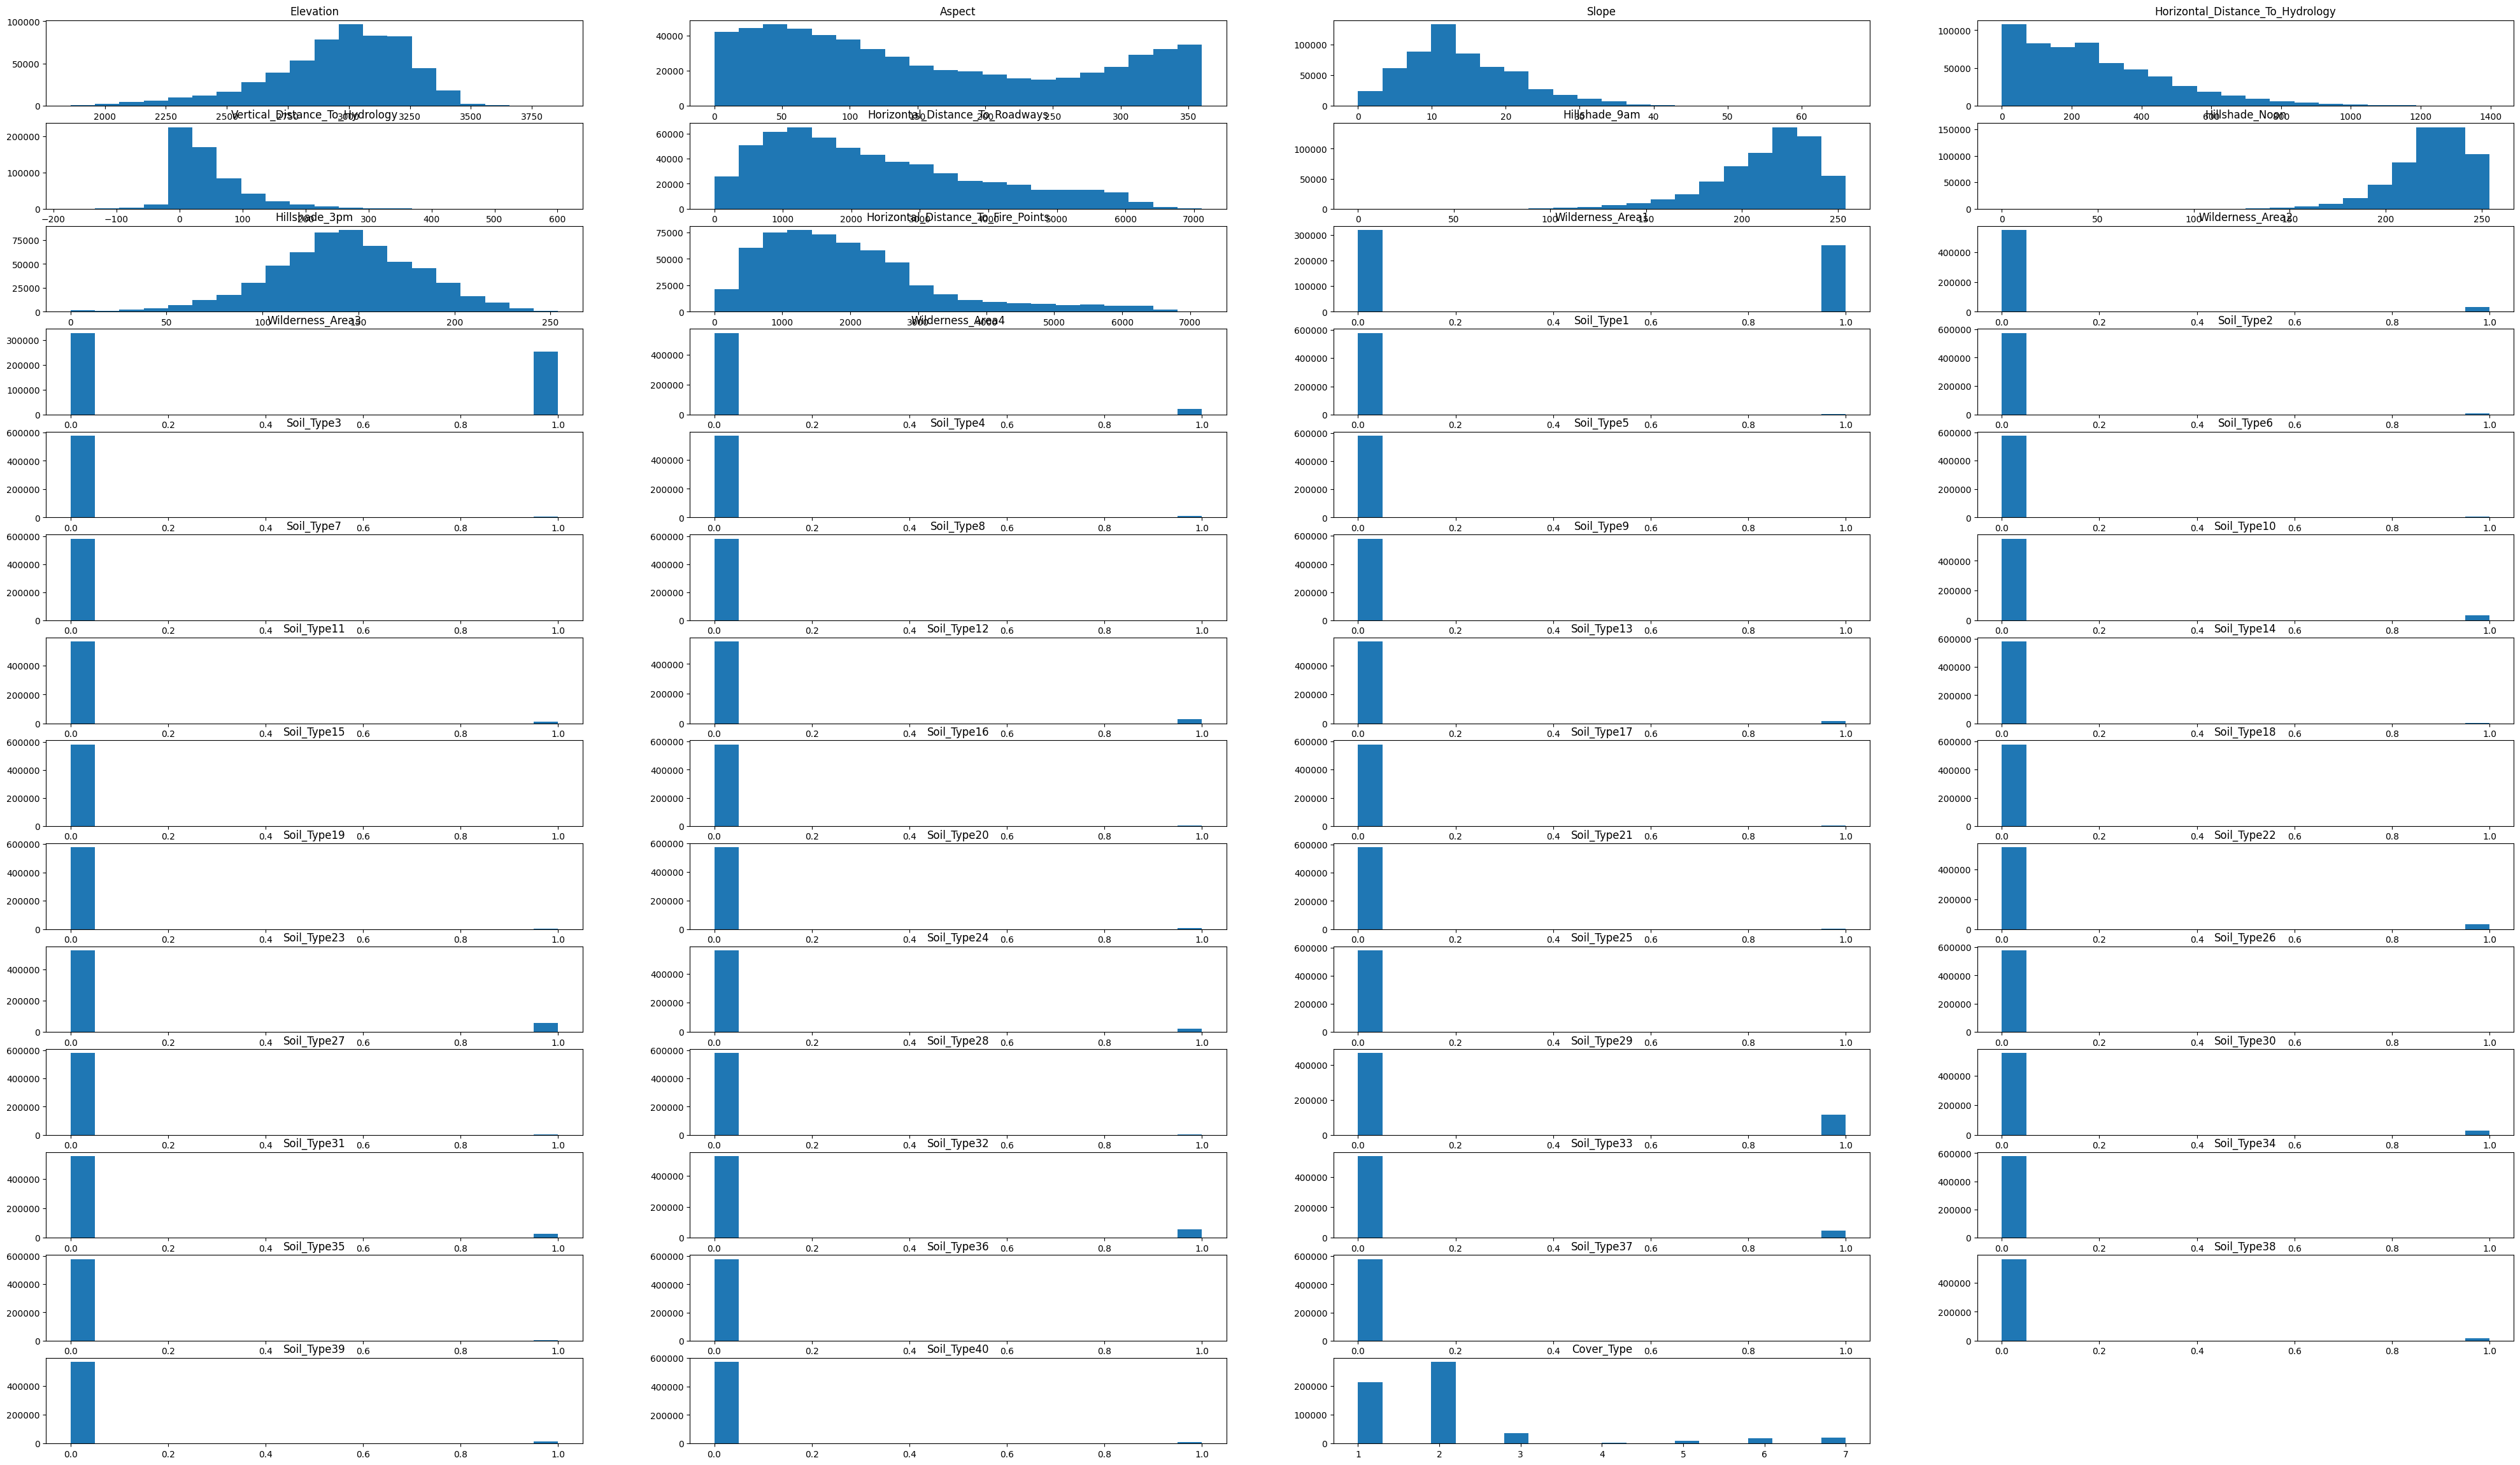

In [8]:
# draw the histogram of feature distribution
i=1
fig = plt.figure(figsize=(50,50))
for feature in data.columns[:55]:
    axe = fig.add_subplot(24,4,i)   
    axe.hist(data[feature],bins=20)
    plt.title(feature)
    i+=1;

In [9]:
class1 = data.loc[(data['Cover_Type'] == 1)].sample(2500)
class2 = data.loc[(data['Cover_Type'] == 2)].sample(2500) 
class3 = data.loc[(data['Cover_Type'] == 3)].sample(2500) 
class4 = data.loc[(data['Cover_Type'] == 4)].sample(2500) 
class5 = data.loc[(data['Cover_Type'] == 5)].sample(2500) 
class6 = data.loc[(data['Cover_Type'] == 6)].sample(2500) 
class7 = data.loc[(data['Cover_Type'] == 7)].sample(2500) 

frames = [class1, class2, class3, class4, class5, class6, class7]
result = pd.concat(frames)
result.reset_index(drop=True)
# column 'Soil_Type15' full of 0, therefore we delete it.
result = result.drop(['Soil_Type15'], axis=1)


In [10]:
result.to_csv('17500.csv', index = False)

## Model Comparison

In [3]:
data = pd.read_csv('17500.csv')

In [4]:
#****************************************************** Data Normalization **************************************************************
def preprocessing(input):
    df2 = pd.DataFrame()
    df1 = input.loc[:, data.columns != 'Cover_Type']
    columns = df1.columns.values
    for i in columns:
        in_numpy = df1[i].to_numpy()
        rows = in_numpy.shape[0]
        in_numpy = in_numpy.reshape((-1,rows))
        minimum = np.amin(in_numpy)
        maximum = np.amax(in_numpy)
        if maximum == minimum:
            in_numpy = np.full((1,rows),minimum)
            in_numpy = in_numpy.reshape((rows,-1))
            df2 = pd.concat([df2,pd.DataFrame(in_numpy)],axis=1)
            continue
        in_numpy = (in_numpy-np.full((1,rows),minimum))/(maximum-minimum)
        in_numpy = in_numpy.reshape((rows,-1))
        df2 = pd.concat([df2,pd.DataFrame(in_numpy)],axis=1)
    df3 = input['Cover_Type']
    df2 = pd.concat([df2,df3],axis=1)
    df2.columns = input.columns.values
    return df2

data = preprocessing(data)
data= data.sample(frac=1).reset_index(drop=True)

### Random Forest (RF)

In [40]:
row, col = data.shape
print('Shape of sampled dataset：{}'.format(data.shape))
feature = data.iloc[:,:col-1]
label = data.iloc[:,-1]
#random seed
seed = 4

Shape of sampled dataset：(17500, 54)


In [41]:
#*********************************** Split Training and Testing Datasets for Grid Search **************************************************
def train_test_split(X,y,test_ratio=0.3,seed=seed):
    if seed:
        np.random.seed(seed)
    shuffled_indexes = np.random.permutation(len(X))
    test_size = int(len(X) * test_ratio)
    train_index = shuffled_indexes[test_size:]
    test_index = shuffled_indexes[:test_size]
    return X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

#****************************************************Grid Search CV***********************************************************************
def Gridsearch_CV(param_grid, data, folds=10):
    f1_overall = []
    value_lenth = []
    scores = []
    para = []
    for key in param_grid.keys():
        value_lenth.append(len(param_grid.get(key)))
        for key_num in range(len(param_grid.get(key))):
            para.append(param_grid.get(key)[key_num])
    first_para = para[0:value_lenth[0]]
    sec_para  = para[value_lenth[0]:(value_lenth[0]+value_lenth[1])]
    third_para = para[(value_lenth[0]+value_lenth[1]):sum(value_lenth)]
    m=0    
    for e in first_para:
        for d in sec_para:
            for c in third_para:
                #fit different models
                forest = RandomForestClassifier(max_leaf_nodes=e,
                                 n_estimators=d,
                                 max_depth=c, n_jobs = -1, random_state = seed+1)
                points_in_fold = int(len(data)/folds)
                f1_scores = []
                for i in range(folds):
                    if i == 0:
                        X_valid  = data.iloc[0:(i+1)*points_in_fold]
                        X_train = data.iloc[(i+1)*points_in_fold:folds*points_in_fold] 
                    elif i == folds-1:
                        X_valid  = data.iloc[i*points_in_fold:len(data)]
                        X_train = data.iloc[0:i*points_in_fold]
                    else:
                        X_valid  = data.iloc[i*points_in_fold:(i+1)*points_in_fold]
                        X_train = pd.concat([data.iloc[0:i*points_in_fold], data.iloc[(i+1)*points_in_fold:folds*points_in_fold]])
                    forest.fit(X_train.iloc[:,:(col-1)] , X_train.iloc[:,-1])
                    valid_predict = forest.predict(X_valid.iloc[:,:(col-1)])
                    f1_scores.append(f1_score(X_valid.iloc[:,-1],valid_predict,average='macro'))
                m+=1
                print(f"{m}-{folds} folds cross validation's macro f1 score for parameter max_leaf_nodes:{e}, 'n_estimators': {d}, 'depth': {c} is {sum(f1_scores)/folds}" )
                f1_overall.append(sum(f1_scores)/folds)
    scores = np.array(f1_overall).reshape((len(first_para),len(sec_para),len(third_para)))
    i,j,k = np.where(scores == np.max(scores))
    print(f"the best first parameter is {first_para[int(i)]},"
          f"\nthe best second parameter is {sec_para[int(j)]},"
          f"\nthe best third parameter is {third_para[int(k)]},"
          f"\nthe best f1 score is {np.max(scores)}")


In [42]:
#****************************************************Find best parameters*****************************************************************
param_grid = {'max_leaf_nodes': [1500,2000], 'n_estimators': [90,100], 'max_depth': [30,40,50]}
X_train, X_test, y_train, y_test = train_test_split(feature, label,seed=seed)
Gridsearch_CV(param_grid, pd.concat([X_train, y_train], axis=1), folds=10)

1-10 folds cross validation's macro f1 score for parameter max_leaf_nodes:1500, 'n_estimators': 90, 'depth': 30 is 0.8512221460491387
2-10 folds cross validation's macro f1 score for parameter max_leaf_nodes:1500, 'n_estimators': 90, 'depth': 40 is 0.851736940164636
3-10 folds cross validation's macro f1 score for parameter max_leaf_nodes:1500, 'n_estimators': 90, 'depth': 50 is 0.851736940164636
4-10 folds cross validation's macro f1 score for parameter max_leaf_nodes:1500, 'n_estimators': 100, 'depth': 30 is 0.8541094042059351
5-10 folds cross validation's macro f1 score for parameter max_leaf_nodes:1500, 'n_estimators': 100, 'depth': 40 is 0.8537462103272773
6-10 folds cross validation's macro f1 score for parameter max_leaf_nodes:1500, 'n_estimators': 100, 'depth': 50 is 0.8537462103272773
7-10 folds cross validation's macro f1 score for parameter max_leaf_nodes:2000, 'n_estimators': 90, 'depth': 30 is 0.8575676218342838
8-10 folds cross validation's macro f1 score for parameter ma

random forest test set:
F1 score : 0.853466053444861
confusion matrix : [[588 100   0   0  20   1  44]
 [139 498  10   0  61  29   6]
 [  0   1 573  45   4 107   0]
 [  0   0  12 735   0  11   0]
 [  0  15  14   0 711   6   0]
 [  0   1  82  20   2 653   0]
 [ 22   1   0   0   0   0 739]]


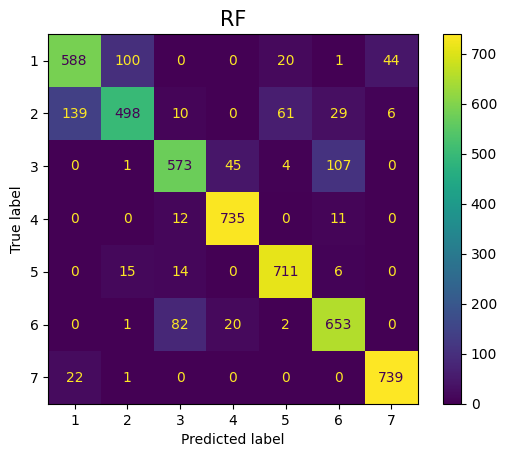

In [43]:
#********************************************************Results Display*******************************************************************
forest = RandomForestClassifier(max_leaf_nodes=2000,
                                 n_estimators=100,
                                 max_depth=40, n_jobs = -1, random_state = seed+1)
forest.fit(X_train,y_train)
Label = [1,2,3,4,5,6,7]

y_test_pred_forest=forest.predict(X_test)
print("random forest test set:")
print("F1 score :",f1_score(y_test,y_test_pred_forest,average='macro'))
print("confusion matrix :",confusion_matrix(y_test,y_test_pred_forest,labels = Label))

RF_confusion = confusion_matrix(y_test,y_test_pred_forest,labels = Label)
disp = ConfusionMatrixDisplay(confusion_matrix=RF_confusion,
                              display_labels=Label)
disp.plot()
plt.title('RF',size=15,loc='center')
#plt.savefig("./RF.jpg")
plt.show()

### SVM

In [50]:
print('Shape of train dataset：{}'.format(data.shape))
train = preprocessing(data)

Shape of train dataset：(17500, 54)


In [51]:
#********************************************************Data Training********************************************************************
print(type(train))
feature = train.iloc[:,:53]
# print(feature)
label = train.Cover_Type
# print(label)

x_train, y_test, x_label, y_label = train_test_split(feature, label)
print(x_train.shape, x_label.shape)
print(y_test.shape, y_label.shape)

<class 'pandas.core.frame.DataFrame'>
(12250, 53) (12250,)
(5250, 53) (5250,)


In [52]:
#********************************************************Grid Search+ CV*******************************************************************
def Gridsearch_CV(param_grid, data, folds=10):
    f1_overall = []
    value_lenth = []
    scores = []
    para = []
    for key in param_grid.keys():
        value_lenth.append(len(param_grid.get(key)))
        for key_num in range(len(param_grid.get(key))):
            para.append(param_grid.get(key)[key_num])
    first_para = para[0:value_lenth[0]]
    sec_para  = para[value_lenth[0]:(value_lenth[0]+value_lenth[1])]
    m=0    
    for e in first_para:
        for d in sec_para:
                #fit different models
            svc = SVC(C=e,gamma=d,kernel='rbf', probability=True)
            points_in_fold = int(len(data)/folds)
            f1_scores = []
            for i in range(folds):
                if i == 0:
                    X_valid  = data.iloc[0:(i+1)*points_in_fold]
                    X_train = data.iloc[(i+1)*points_in_fold:folds*points_in_fold] 
                elif i == folds-1:
                    X_valid  = data.iloc[i*points_in_fold:len(data)]
                    X_train = data.iloc[0:i*points_in_fold]
                else:
                    X_valid  = data.iloc[i*points_in_fold:(i+1)*points_in_fold]
                    X_train = pd.concat([data.iloc[0:i*points_in_fold], data.iloc[(i+1)*points_in_fold:folds*points_in_fold]])
                svc.fit(X_train.iloc[:,:(col-1)] , X_train.iloc[:,-1])
                valid_predict = svc.predict(X_valid.iloc[:,:(col-1)])
                f1_scores.append(f1_score(X_valid.iloc[:,-1],valid_predict,average='macro'))
            m+=1
            print(f"{m}-{folds} folds cross validation's macro f1 score for parameter C:{e}, 'gamma': {d} is {sum(f1_scores)/folds}" )
            f1_overall.append(sum(f1_scores)/folds)
    scores = np.array(f1_overall).reshape((len(first_para),len(sec_para)))
    i,j = np.where(scores == np.max(scores))
    print(f"the best first parameter is {first_para[int(i)]},"
          f"\nthe best second parameter is {sec_para[int(j)]},"
          f"\nthe best f1 score is {np.max(scores)}")
    
#find best hyperparameter
#param_grid = {'C': [0.1,1,10], 'gamma': [0.01,0.1,1]}
#X_train, X_test, y_train, y_test = train_test_split(feature, label)
#Gridsearch_CV(param_grid, pd.concat([X_train, y_train], axis=1), folds=10)

F1 score of train set with SVC: 0.8070509859099353
confusion matrix : [[543 127   1   0  24   0  55]
 [143 471  20   0  86  29   6]
 [  0   2 527  56   6 138   0]
 [  0   0  33 663   0  21   0]
 [  6  39  15   0 689   2   0]
 [  1   5 122  32   6 617   0]
 [ 24   0   0   0   0   0 741]]


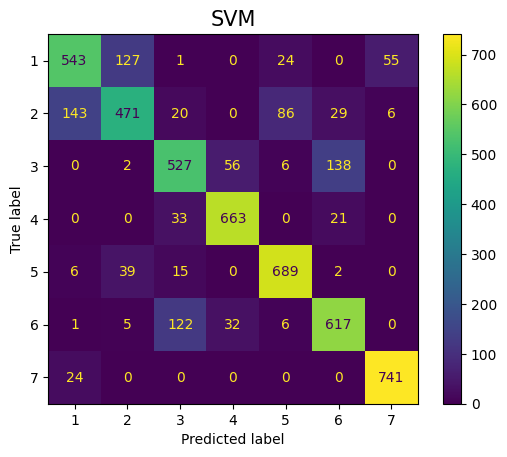

In [53]:
#********************************************************Results Display*******************************************************************
svc = SVC(C=10,gamma=1,kernel='rbf', probability=True)

svc.fit(x_train,x_label)

y_test_pred_svc=svc.predict(y_test)

print("F1 score of train set with SVC:", f1_score(y_label,y_test_pred_svc, average = 'macro'))
# Confusion Matrix
Label = [1,2,3,4,5,6,7]
print("confusion matrix :", confusion_matrix(y_label,y_test_pred_svc,labels = Label))
Label = [1,2,3,4,5,6,7]
SVM_confusion = confusion_matrix(y_label,y_test_pred_svc,labels = Label)
disp = ConfusionMatrixDisplay(confusion_matrix=SVM_confusion,
                              display_labels=Label)
disp.plot()
plt.title('SVM',size=15,loc='center')
plt.savefig("./SVM.jpg")
plt.show()

### Logistic Regression

In [54]:
#****************************************************Find best parameters*****************************************************************
def test_train(folds, input):    
    df1 = input.loc[:, train.columns != 'Cover_Type']
    df2 = input['Cover_Type']
    accuracy_scores = []
    total_data_points = input.shape[0]
    for i in range(folds):
        test_data = df1.loc[(i*total_data_points/folds):((i+1)*(total_data_points/folds))]
        test_targets = df2.loc[(i*total_data_points/folds):((i+1)*(total_data_points/folds))]
        if i == 0:
            train_data = df1.loc[((i+1)*(total_data_points/folds)):]
            train_targets = df2.loc[((i+1)*(total_data_points/folds)):]
        elif i == folds-1:
            train_data = df1.loc[:(i*total_data_points/folds)]
            train_targets = df2.loc[:(i*total_data_points/folds)]
        else:
            train_data_start = df1.loc[:(i*total_data_points/folds)]
            train_data_end = df1.loc[((i+1)*(total_data_points/folds)):]
            train_data = pd.concat([train_data_start,train_data_end])
            train_targets_start = df2.loc[:(i*total_data_points/folds)]
            train_targets_end = df2.loc[((i+1)*(total_data_points/folds)):]
            train_targets = pd.concat([train_targets_start,train_targets_end])
        log_reg.fit(train_data, train_targets)
        test_predict = log_reg.predict(test_data)
        f1_scores.append(f1_score(test_targets,test_predict,average='macro'))
        print("confusion matrix:\n",confusion_matrix(test_targets, test_predict, labels = classNames))
    print(f1_scores)
    print('Mean Accuracy Scores = ', np.mean(f1_scores))
    return np.mean(f1_scores)


X_train, X_test, y_train, y_test = train_test_split(feature, label,seed=seed)
classNames = [1,2,3,4,5,6,7]
# best_acc = 0.1
# best_ratio = 0
# for ratio in np.arange(0.0, 1.1, 0.1):
#     log_reg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=ratio)
#     acc = test_train(10, train)
#     if(acc>best_acc):
#         best_acc = acc
#         best_ratio = ratio
#     print(best_acc, best_ratio)

# # the best ratio is 0.4
LR = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.4)

# Final train after grid+cv
LR.fit(X_train, y_train)
y_test_pred_LR = LR.predict(X_test)
LR_f1 = f1_score(y_test, y_test_pred_LR, average='macro')
print(LR_f1)

0.69196635512555


random forest test set:
F1 score : 0.69196635512555
confusion matrix : [[490 128   0   0  47   4  81]
 [149 391  14   0 149  42  10]
 [  0  11 406 100  22 190   0]
 [  0   0  53 633   0  31   0]
 [ 18 114  40   0 556  23   0]
 [  0  13 171  71  39 489   0]
 [ 79   0   2   0   1   0 683]]


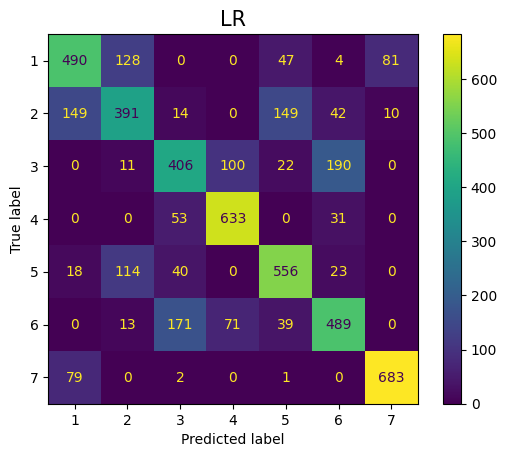

In [55]:
#********************************************************Results Display*******************************************************************
y_test_pred_LR=LR.predict(X_test)
print("Logistic Regression test set:")
print("F1 score :",f1_score(y_test,y_test_pred_LR,average='macro'))
print("confusion matrix :",confusion_matrix(y_test,y_test_pred_LR,labels = Label))

LR_confusion = confusion_matrix(y_test,y_test_pred_LR,labels = Label)
disp = ConfusionMatrixDisplay(confusion_matrix=LR_confusion,
                              display_labels=Label)
disp.plot()
plt.title('LR',size=15,loc='center')
plt.savefig("./LR.jpg")
plt.show()

### KNN

Functions for KNN and CV

In [29]:
# Target values - 
classes = [1,2,3,4,5,6,7]

def KNN_with_cross_validation(folds, input, neighbours, ConfusionMatrix = False):
    ''' 
    Inputs :-
    folds : Number of folds for cross-validation
    input : Pandas Dataframe file with data
    neighbours : K-value for KNN model
    
    Output :-
    accuracy_scores : List of accuracy scores for each fold of cross validation 
    '''
    neigh = KNeighborsClassifier(n_neighbors=neighbours)
    f1_scores = test_train_f1(folds, input, neigh, ConfusionMatrix)
    return f1_scores

def test_train_f1(folds, input, neigh, ConfusionMatrix):  
    ''' 
    Inputs :-
    folds : Number of folds for cross-validation
    input : Pandas Dataframe file with data
    neigh : sklearn function for required model
    
    Output :-
    accuracy_scores : List of accuracy scores for each fold of cross validation 
    '''
    # Design Matrix
    df1 = input.loc[:, data.columns != 'Cover_Type']
    # Targets
    df2 = input['Cover_Type']
    f1_scores = []
    total_data_points = input.shape[0]
    ConfusionMatrices = []
    for i in range(folds):
        test_data = df1.loc[(i*total_data_points/folds):((i+1)*(total_data_points/folds))]
        test_targets = df2.loc[(i*total_data_points/folds):((i+1)*(total_data_points/folds))]
        if i == 0:
            train_data = df1.loc[((i+1)*(total_data_points/folds)):]
            train_targets = df2.loc[((i+1)*(total_data_points/folds)):]
        elif i == folds-1:
            train_data = df1.loc[:(i*total_data_points/folds)]
            train_targets = df2.loc[:(i*total_data_points/folds)]
        else:
            train_data_start = df1.loc[:(i*total_data_points/folds)]
            train_data_end = df1.loc[((i+1)*(total_data_points/folds)):]
            train_data = pd.concat([train_data_start,train_data_end])
            train_targets_start = df2.loc[:(i*total_data_points/folds)]
            train_targets_end = df2.loc[((i+1)*(total_data_points/folds)):]
            train_targets = pd.concat([train_targets_start,train_targets_end])
        neigh.fit(train_data, train_targets)
        test_predict = neigh.predict(test_data)
        f1_scores.append(f1_score(test_targets,test_predict, average='macro'))
        if ConfusionMatrix == True:
            cm = confusion_matrix(test_targets, test_predict, labels=classes)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
            ConfusionMatrices.append(disp)
    if ConfusionMatrix == True:
        return f1_scores, ConfusionMatrices
    else:
        return f1_scores

Gridsearch Function

In [30]:
def gridsearch(folds, input, max_range):
    ''' 
    Inputs :-
    folds : Number of folds for cross-validation
    input : Pandas Dataframe file with data
    max_range : Range for K for gridsearch
    
    Output :-
    mean_f1_scores : List of mean of Macro F-1 Scores over cross-validation for each K value. mean_f1_scores[i] represents mean f-1 score for 'i+1' K value
    '''
    mean_f1_scores = []
    for i in range(1,max_range):
        # Do cross validation for N folds for i Neighbours
        f1_scores = KNN_with_cross_validation(folds, input, i)
        mean_f1_scores.append(np.mean(f1_scores))
    return mean_f1_scores

Conduct Gridsearch for range K 1 to 30, with 10 fold Cross Validation

In [31]:
mean_f1_scores = gridsearch(10, data, 30)

Final values of F1 Scores corresponding to K value

In [32]:
averages = pd.DataFrame(mean_f1_scores)
averages.columns = ['Average F-1 Scores']
averages['K-Value']=averages.index +1
averages_arranged = averages.sort_values('Average F-1 Scores', axis = 0, ascending=False)
print(averages_arranged[:5].to_string(index=False))
print('\n Best Average F-1 Score : \n')
print(averages_arranged[:1].to_string(index=False))

 Average F-1 Scores  K-Value
           0.823155        1
           0.806419        3
           0.802903        2
           0.801839        4
           0.797490        5

 Best Average F-1 Score : 

 Average F-1 Scores  K-Value
           0.823155        1


Plot of Average Macro F1 Scores

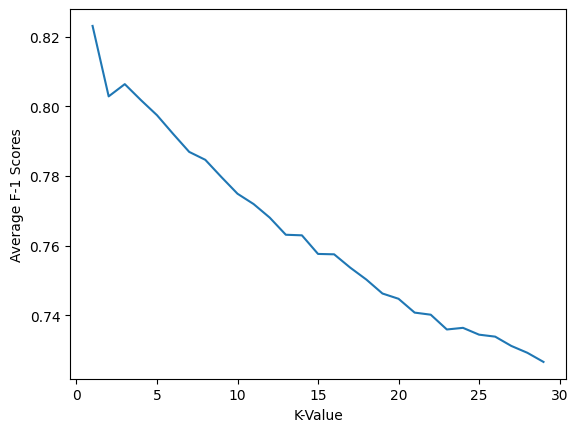

In [38]:
y = averages['Average F-1 Scores'].to_numpy()
x = averages['K-Value'].to_numpy()
plt.plot(x,y)
plt.xlabel('K-Value')
plt.ylabel('Average F-1 Scores')
plt.savefig('Macro_f1_for_K_Values.png')
plt.show()


Extract Confusion Matrix for K=1 from the fold which has best F-1 score during Cross Validation

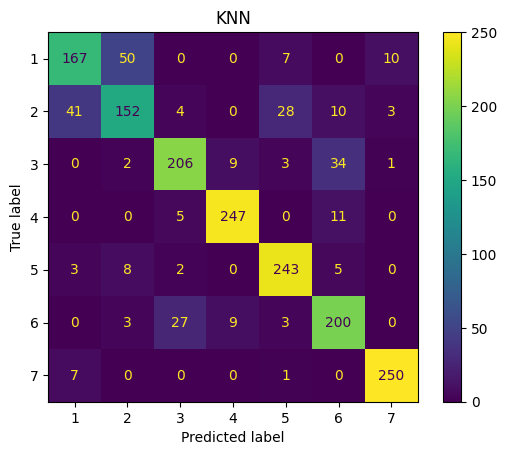

In [39]:
f1_scores1, ConfusionMatrices = KNN_with_cross_validation(10, data, 1, ConfusionMatrix=True)
f1_scores1_array = np.array(f1_scores1)
position = np.argmax(f1_scores1_array)
disp = ConfusionMatrices[position]
disp.plot()
plt.title('KNN')
plt.savefig('KNN_Conf_Matrix.png')
plt.show()
